In [ ]:
!pip install nltk

# **Project: Book Recommendation System**

#Business Objective:
##Generate the features from the dataset and use them to recommend the books accordingly to the users.


#IMPORT THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#EDA

#READ THE DATASETS: BOOKS, RATINGS, USERS

In [ ]:
ratings=pd.read_csv("/content/Ratings.csv")
users=pd.read_csv("/content/Users.csv")

In [ ]:
books=pd.read_csv("/content/Books.csv")

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.shape

(271360, 8)

In [ ]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

 there are some books with the same title but possibly different editions or ISBNs.

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [ ]:
ratings[ratings['Book-Rating'] == 0].shape

(716109, 3)

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.shape

(278858, 3)

In [ ]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

#MERGE THE DATA

In [ ]:
data = pd.merge(users,ratings, on='User-ID')
data = pd.merge(data, books, on='ISBN')

data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


# Data Cleaning and Pre-processing

##Data Dimensions

In [ ]:
data.shape

(1031136, 12)

##Data columns

In [ ]:
data.columns

Index(['User-ID', 'Location', 'Age', 'ISBN', 'Book-Rating', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
#Droping Unnecessary columns
data.drop(['Location','Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

##Data Types and Non Null Count

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Age                  753301 non-null   float64
 2   ISBN                 1031136 non-null  object 
 3   Book-Rating          1031136 non-null  int64  
 4   Book-Title           1031136 non-null  object 
 5   Book-Author          1031134 non-null  object 
 6   Year-Of-Publication  1031136 non-null  object 
 7   Publisher            1031134 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.9+ MB


##Checking for Null Values

In [ ]:
data.isna().sum()

User-ID                     0
Age                    277835
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
dtype: int64

### There are missing values in the column Age, Book-Author and Publisher

##Imputing the Null Values

In [ ]:
#Rows having null value for publisher
data[data['Publisher'].isnull()]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
857163,98391,52.0,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN
857174,98391,52.0,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
#Rows have null values for book author
data[data['Book-Author'].isnull()]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
778170,63714,29.0,0751352497,10,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
857604,98647,26.0,9627982032,8,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [ ]:
#REPLACING NULL VALUES OF COLUMN BOOK AUTHOR AND PUBLICATION WITH  "NOT GIVEN"
data['Book-Author'].fillna('Not Given', inplace=True)
data['Publisher'].fillna('Not Given', inplace=True)

In [ ]:
#percentage of missing values of age
missing_age_count = data['Age'].isna().sum()
percent_missing_age = (missing_age_count / len(data)) * 100
print(f"Percentage of missing values in Age column: {percent_missing_age:.2f}%")

Percentage of missing values in Age column: 26.94%


In [ ]:
#Checking for Skweness
data["Age"].skew()

2.788844003966689

In [ ]:
#REPLACE NULL VALUES OF AGE WITH MEDIAN
data['Age'].fillna(data['Age'].median(), inplace=True)

In [ ]:
# convert the datatype of column age from float to int
#Since age is a discrete variable and should be represented as an integer.
data['Age'] = data['Age'].astype(int)

##Unique Values

In [ ]:
data.nunique()

User-ID                 92106
Age                       141
ISBN                   270151
Book-Rating                11
Book-Title             241071
Book-Author            101588
Year-Of-Publication       202
Publisher               16730
dtype: int64

### Unique User-IDs are 92106 but the total count is 1031136 , which means that a particular user can read more than one book.

In [ ]:
data["Book-Rating"].unique()

array([ 0,  5,  8,  9,  7,  6, 10,  4,  3,  2,  1])

In [ ]:
data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981, 0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, '2002', 1977, 1975, 1965, 1941, 1970,
       '1996', '1999', 1972, '1989', '1992', '2001', 1953, 1962, 1973,
       '2004', 1960, '1997', '2000', '0', 1954, 1966, 1920, '1998',
       '2003', 1967, 1956, 1942, 1955, 1951, 1969, 1948, '1977', '1990',
       '1986', '1994', '1982', 1963, 1964, '1995', '1959', '1988', 1950,
       '1991', '1984', 2005, 1943, '1993', '1987', '1983', '1981', 1957,
       '1972', '1980', 1937, 1940, '1965', '1970', '1979', 1930, 1923,
       1945, 1947, '1976', 1936, '1985', '1978', 1925, '1966', '1958',
       '1975', '1973', 1927, '1974', '1967', '1971', '1969', 2030, '1968',
       2011, '1960', '1964', 2020, 1939, 1926, 1938, '1961', 1911, 1904,
       1949, 1932, 1929, '1953', '1963', '1955', '1944', '1920', '1


* Non-numeric Values: 'DK Publishing Inc', 'Gallimard', which are likely errors where publisher names were mistakenly recorded in the publication year column.
* Many years are represented as strings ('2002', '1996', etc.), which could be cleaned up by changing the data type.



In [ ]:
data[data['Year-Of-Publication'].isin(['DK Publishing Inc','Gallimard'])]

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
906829,130571,35,0789466953,0,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...
913994,137190,31,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
946370,169663,35,078946697X,0,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
946371,227771,19,078946697X,7,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...


In [ ]:
# Drop rows having year as 'DK Publishing Inc', "Gallimard"
data = data[~data['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]

In [ ]:
#Changing the data type
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'], errors='coerce')

In [ ]:
#print unique years
year = data['Year-Of-Publication'].unique()
year.sort()
year

array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
       1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
       2024, 2026, 2030, 2037, 2038, 2050])

* Future Years like 2026,2030,2037,2038,2050 are present, which are likely errors.
* Years like 0, 1378, 1376 are present, which is not correct for modern books.

In [ ]:
# replacing the years 0,1376,1378 by 1806 and future yeras by 2024
data['Year-Of-Publication'].replace([0,1376,1378], 1806, inplace=True)
data['Year-Of-Publication'].replace([2026, 2030, 2037, 2038, 2050], 2024, inplace=True)

In [ ]:
year = data['Year-Of-Publication'].unique()
year.sort()
year

array([1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911,
       1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024])

#Duplicated values

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['User-ID'].duplicated().sum()

939026

#Model Building

#### Content based filtering:
It suggests items to users based on the attributes or features of the items and the user's past behavior.

In [ ]:
#The sampled data will be the same every time the code is run because of the fixed random seed.
np.random.seed(123)
data=data.sample(20000)

In [ ]:
data_subset = data[['Book-Title', 'Book-Author']].copy()

In [ ]:
data_subset.duplicated().sum()

4659

In [ ]:
data_subset.drop_duplicates(inplace=True)
data_subset.shape

(15341, 2)

For content-based filtering, the columns that we consider for vectorization are:

Book-Title: This column contains the titles of the books, which are crucial for understanding the content and theme of each book.

Book-Author: The authors of the books provide valuable information about the writing style, genre, and thematic elements of the books.


In [ ]:
data_subset['combined_features'] = (data_subset['Book-Title'] + ' ' +data_subset['Book-Author'] )

In [ ]:
data_subset['combined_features'].iloc[25]

'Die PrÃ?Â¼fung. F. Paul Wilson'

In [ ]:
data_subset['combined_features']

881498     Claudia's Book (Baby-Sitters Club Portrait Col...
398781     Indigo Slam: An Elvis Cole Novel (Elvis Cole N...
572199          Four Letters of Love: A Novel Niall Williams
793084                  The Hungry Thing Returns Jan Slepian
262059     People of the Fire (The First North Americans ...
                                 ...                        
696955     Si Hubiera Espinas/If There Be Thorns Virginia...
434693     The 27-Ingredient Chili Con Carne Murders (Eug...
402063                         Vengeance in Death J. D. Robb
606930                        Lights Of Home Marilyn Pappano
1002249                     The Fortune Catcher Susanne Pari
Name: combined_features, Length: 15341, dtype: object

##Preprocessing the combined data

In [ ]:
sw = stopwords.words('english')
def stopwords(text):
    if isinstance(text, str):
        text = [word.lower() for word in text.split() if word.lower() not in sw]
        return " ".join(text)
    else:
        return text

In [ ]:
#Removing the stopwords
data_subset['combined_features'] = data_subset['combined_features'].apply(stopwords)

In [ ]:
import string
def remove_punctuation_and_numbers(text):
    if pd.isna(text):
        return text
    all_chars = string.punctuation + string.digits
    translator = str.maketrans('', '', all_chars)
    return text.translate(translator)

In [ ]:
#removing any punctuations and numbers
data_subset['combined_features']= data_subset['combined_features'].apply(remove_punctuation_and_numbers)

In [ ]:
from nltk.stem import WordNetLemmatizer
import pandas as pd

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []

    for word in words:
        if pd.notna(word):
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        else:
            lemmas.append(word)

    return lemmas

In [ ]:
#lemmatizing
data_subset['combined_features'] = lemmatize_verbs(data_subset['combined_features'])

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [ ]:
#Tokenizing
data_subset['combined_features']= data_subset['combined_features'].apply(lambda x: tokenizer.tokenize(x) if pd.notna(x) else x)

In [ ]:
clustering_data = data_subset['combined_features']

In [ ]:
clustering_data

881498     [claudias, book, babysitters, club, portrait, ...
398781     [indigo, slam, elvis, cole, novel, elvis, cole...
572199         [four, letters, love, novel, niall, williams]
793084                [hungry, thing, returns, jan, slepian]
262059     [people, fire, the, first, north, americans, s...
                                 ...                        
696955     [si, hubiera, espinasif, thorns, virginia, c, ...
434693     [ingredient, chili, con, carne, murders, eugen...
402063                        [vengeance, death, j, d, robb]
606930                      [lights, home, marilyn, pappano]
1002249                    [fortune, catcher, susanne, pari]
Name: combined_features, Length: 15341, dtype: object

##Vectorization

In [ ]:
from gensim.models import Word2Vec
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=clustering_data, vector_size=1000, window=5, min_count=1, max_vocab_size=4000, workers=4)

In [ ]:
# Function to generate document embeddings
def generate_document_embeddings(text_data, model):
    document_embeddings = []
    for tokens in text_data:
        word_embeddings = []
        for token in tokens:
            if token in model.wv:
                word_embeddings.append(model.wv[token])
        if word_embeddings:
            document_embeddings.append(np.mean(word_embeddings, axis=0))
        else:
            document_embeddings.append(np.zeros(model.vector_size))
    return np.array(document_embeddings)

X = generate_document_embeddings(clustering_data, word2vec_model)

In [ ]:
X

array([[ 0.14963891,  0.03746773,  0.03196279, ..., -0.12114485,
        -0.0748033 , -0.05844555],
       [ 0.18075559,  0.04526363,  0.03923184, ..., -0.14812167,
        -0.09068342, -0.06966318],
       [ 0.13311455,  0.03310358,  0.02851846, ..., -0.10854317,
        -0.06672677, -0.05101345],
       ...,
       [ 0.1038537 ,  0.02612228,  0.02219849, ..., -0.08401211,
        -0.05251141, -0.04003558],
       [ 0.08512903,  0.02168312,  0.01811737, ..., -0.0701545 ,
        -0.04306886, -0.03337642],
       [ 0.02565071,  0.00638611,  0.00552501, ..., -0.02117264,
        -0.0130472 , -0.00957529]])

##PCA

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA on X
pca = PCA(n_components=500)
pca_result = pca.fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

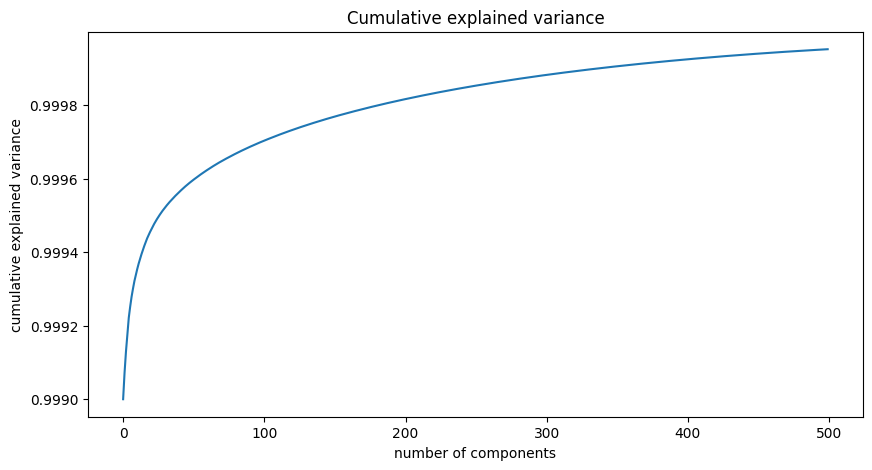

In [ ]:
#How much of the total variance in the data is explained by the first n principal components.
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA with 150 components
pca = PCA(n_components=150)
pca_result = pca.fit_transform(X)

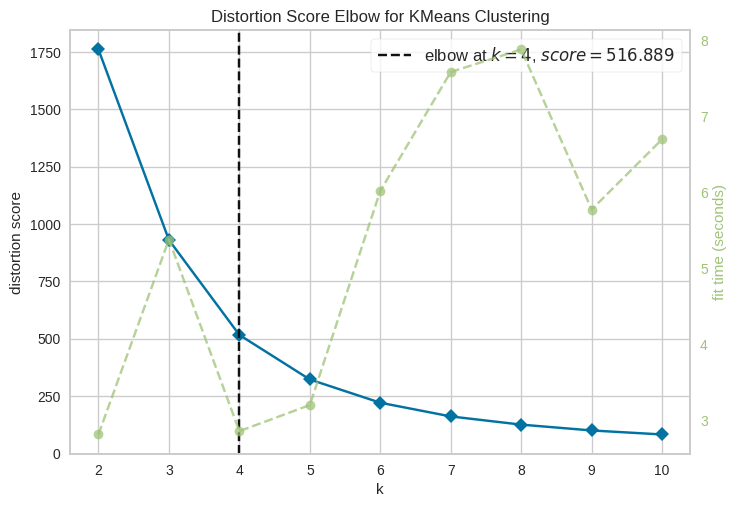

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow_graph = KElbowVisualizer(KMeans(random_state=42), k=10)
elbow_graph.fit(pca_result)
elbow_graph.show()

In [ ]:
from sklearn.metrics import silhouette_score
nc=range(2,9)
l=[]
for i in nc:
  kmeans_model=KMeans(n_clusters=i,init='k-means++',random_state = 42)
  l.append(silhouette_score(pca_result,kmeans_model.fit_predict(pca_result)))

In [ ]:
for i in range(len(l)):
  print(f"K= {i+2}: {l[i]}")

K= 2: 0.5475490390150446
K= 3: 0.5139805931736465
K= 4: 0.5322646096554153
K= 5: 0.5309706492977867
K= 6: 0.5263620827404614
K= 7: 0.5259070614099968
K= 8: 0.5172228269115001


A silhouette score of 0.533  at k=4 is generally considered to indicate a moderately good clustering.


##K-Means Clustering

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4,init='k-means++',random_state = 42)
kmeans.fit(pca_result)

KMeans(n_clusters=4, random_state=42)

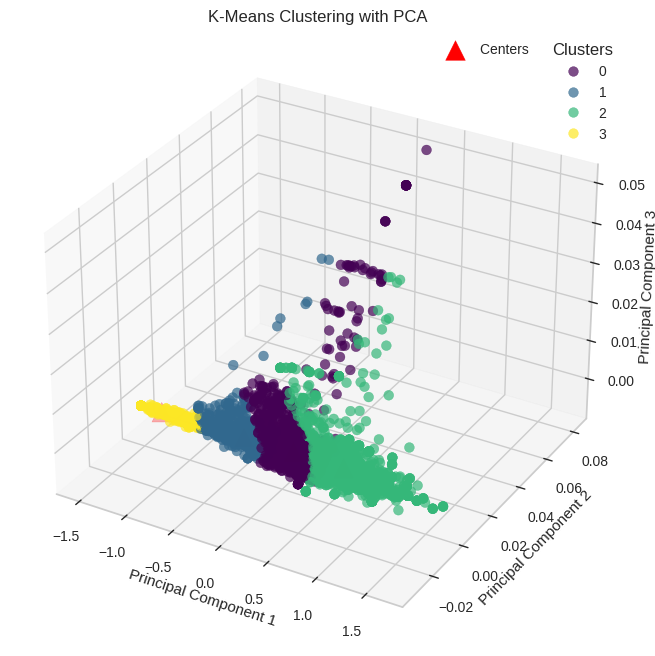

In [ ]:
# Plot clusters in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot data points
sc = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='^', c='red', s=200, label='Centers                      ')
legend1 = ax.legend(*sc.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-Means Clustering with PCA')
plt.legend()
plt.show()

In [ ]:
# Adding a kmeans cluster number attribute
data_subset['kmeans_cluster'] = kmeans.labels_

kmeans_cluster
0    6987
1    4177
2    3205
3     972
Name: count, dtype: int64


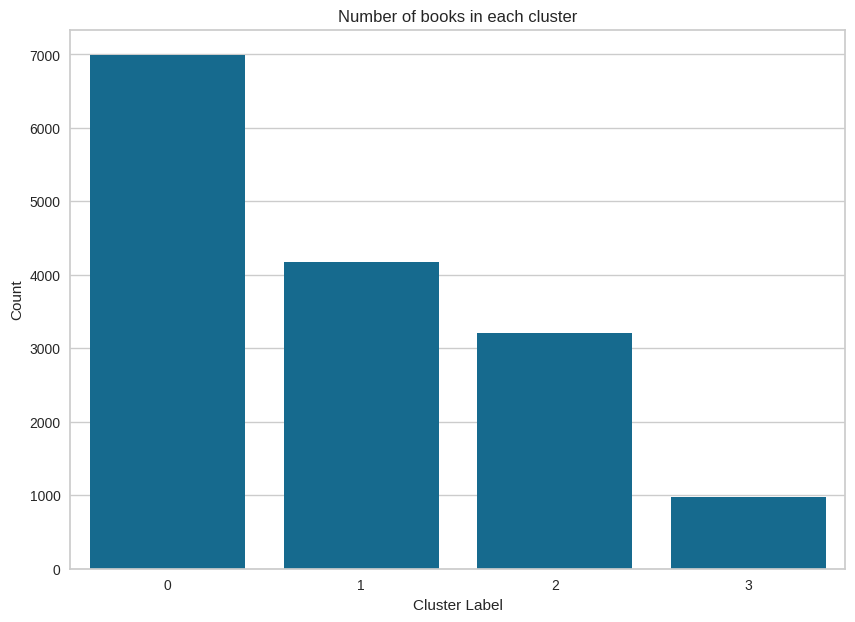

In [ ]:
# Count of data points in each cluster
cluster_counts = data_subset['kmeans_cluster'].value_counts()
print(cluster_counts)
# Plot the cluster counts
plt.figure(figsize=(10, 7))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Number of books in each cluster')
plt.show()


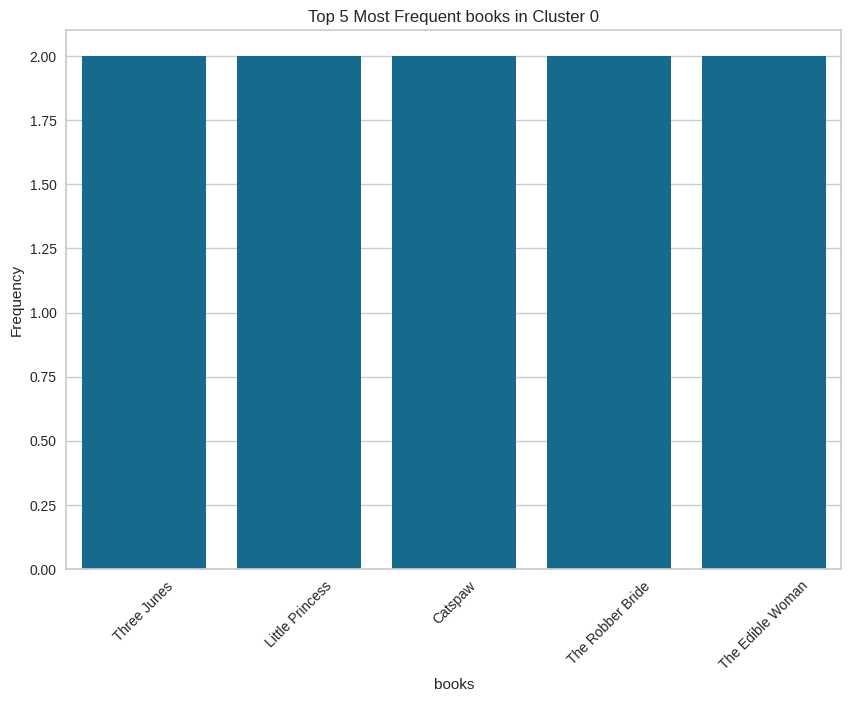

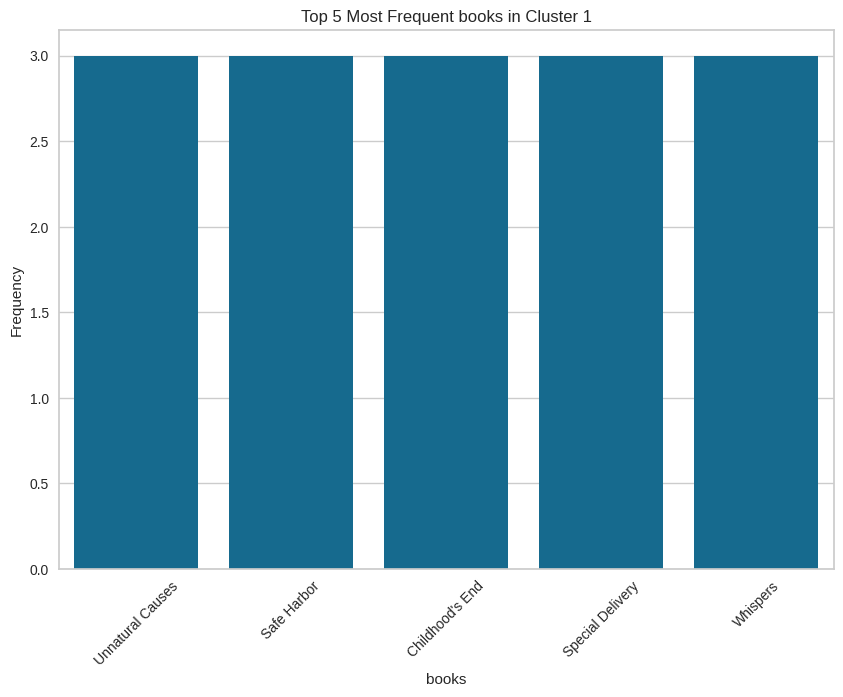

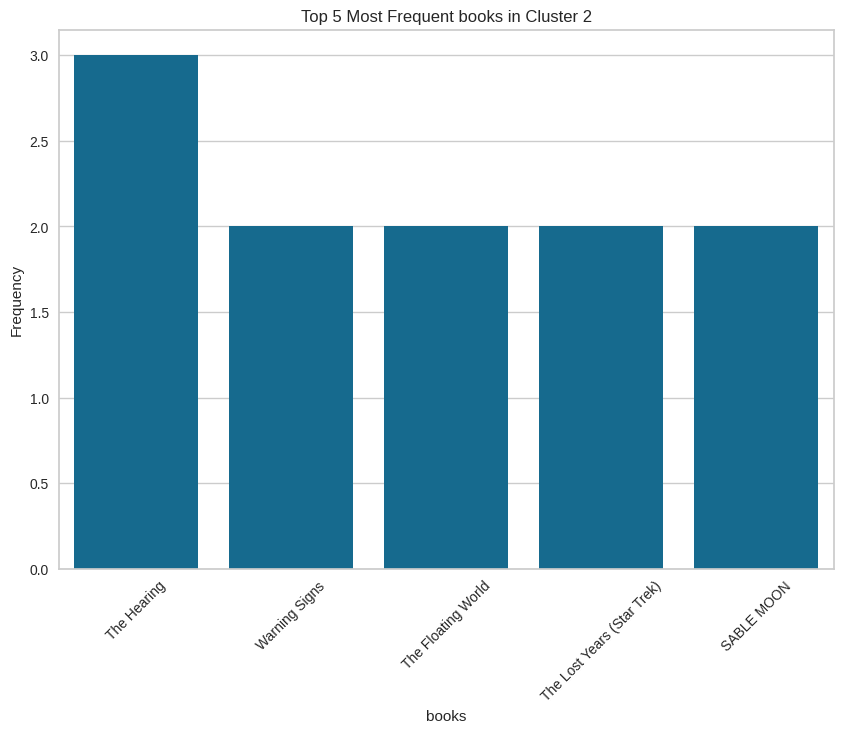

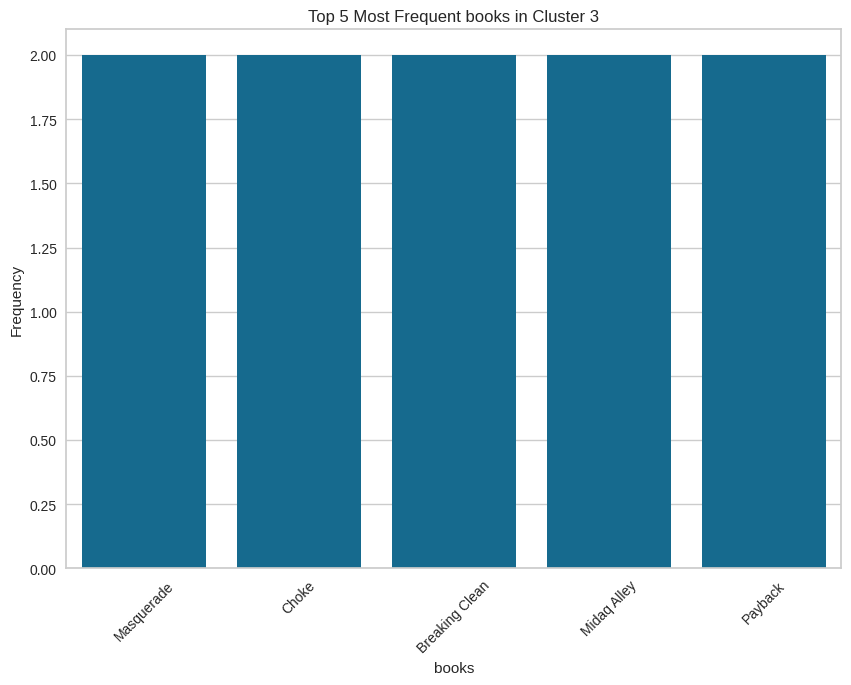

In [ ]:
# 5 most frequent book authors in each cluster
top_books = data_subset.groupby('kmeans_cluster')['Book-Title'].apply(lambda x: x.value_counts().head(5))
for i in range(4):
  plt.figure(figsize=(10, 7))
  ax = sns.barplot(x=top_books[i].index, y=top_books[i].values)
  ax.set_title(f'Top 5 Most Frequent books in Cluster {i}')
  plt.xlabel('books')
  plt.ylabel('Frequency')
  ax.tick_params(axis='x', rotation=45)
  plt.show()

##Hierachical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(pca_result)
data_subset['Hier_cluster_label'] = model.labels_
print(silhouette_score(pca_result, model.labels_))

0.513221114613112


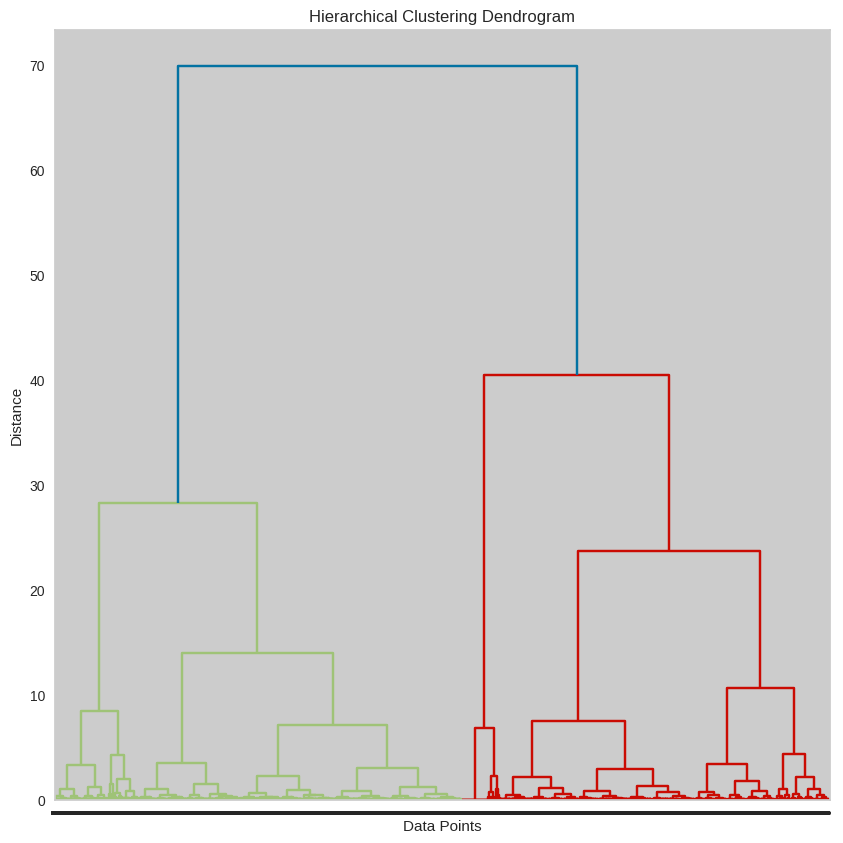

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
Z = linkage(pdist(pca_result), method='ward', metric='euclidean')
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(Z, labels=model.labels_)
plt.show()

Hier_cluster_label
0    6524
1    6388
3    1665
2     764
Name: count, dtype: int64


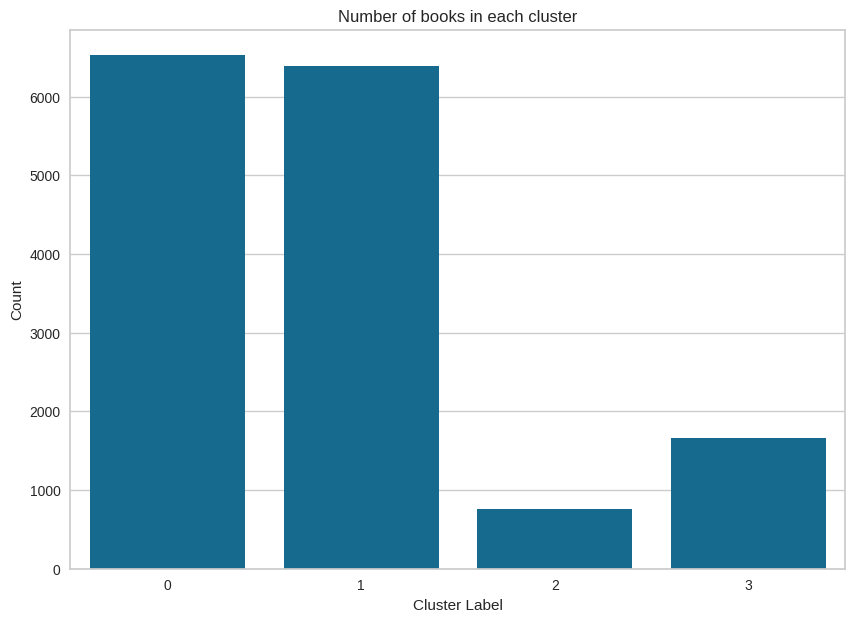

In [ ]:
cluster_counts = data_subset['Hier_cluster_label'].value_counts()
print(cluster_counts)
# Plot the cluster counts
plt.figure(figsize=(10, 7))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Number of books in each cluster')
plt.show()



###Since the silhouette score for K-Means clustering at k=4 is higher than that of hierarchical clustering, it suggests that K-Means clustering may be a more appropriate method for this dataset. The higher silhouette score indicates that the clusters formed by K-Means are more distinct and well-separated compared to those formed by hierarchical clustering.

In [ ]:
data_subset.head(5)

,Book-Title,Book-Author,combined_features,kmeans_cluster,Hier_cluster_label
881498,Claudia's Book (Baby-Sitters Club Portrait Col...,Ann M. Martin,"[claudias, book, babysitters, club, portrait, ...",2,1
398781,Indigo Slam: An Elvis Cole Novel (Elvis Cole N...,Robert Crais,"[indigo, slam, elvis, cole, novel, elvis, cole...",2,3
572199,Four Letters of Love: A Novel,Niall Williams,"[four, letters, love, novel, niall, williams]",0,1
793084,The Hungry Thing Returns,Jan Slepian,"[hungry, thing, returns, jan, slepian]",1,0
262059,People of the Fire (The First North Americans ...,Kathleen O'Neal Gear,"[people, fire, the, first, north, americans, s...",2,1


In [ ]:
merged_data = pd.merge(data, data_subset[['Book-Title', 'kmeans_cluster']], on='Book-Title', how='left')
merged_data.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,kmeans_cluster
0,112026,17,0590484001,0,Claudia's Book (Baby-Sitters Club Portrait Col...,Ann M. Martin,1995,Scholastic,2
1,79186,37,0345435648,0,Indigo Slam: An Elvis Cole Novel (Elvis Cole N...,Robert Crais,2003,Fawcett Books,2
2,21576,31,0374158177,0,Four Letters of Love: A Novel,Niall Williams,1997,Farrar Straus &amp; Giroux,0
3,69971,43,059042890X,0,The Hungry Thing Returns,Jan Slepian,1990,Scholastic Paperbacks,1
4,164675,55,0812521501,0,People of the Fire (The First North Americans ...,Kathleen O'Neal Gear,1991,Tor Books,2


##Calculating the cosine similarity on X

In [ ]:
X

array([[ 0.14963891,  0.03746773,  0.03196279, ..., -0.12114485,
        -0.0748033 , -0.05844555],
       [ 0.18075559,  0.04526363,  0.03923184, ..., -0.14812167,
        -0.09068342, -0.06966318],
       [ 0.13311455,  0.03310358,  0.02851846, ..., -0.10854317,
        -0.06672677, -0.05101345],
       ...,
       [ 0.1038537 ,  0.02612228,  0.02219849, ..., -0.08401211,
        -0.05251141, -0.04003558],
       [ 0.08512903,  0.02168312,  0.01811737, ..., -0.0701545 ,
        -0.04306886, -0.03337642],
       [ 0.02565071,  0.00638611,  0.00552501, ..., -0.02117264,
        -0.0130472 , -0.00957529]])

In [ ]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(X)

In [ ]:
cosine_similarity

array([[1.        , 0.99993189, 0.99993829, ..., 0.99991887, 0.99990525,
        0.99960628],
       [0.99993189, 1.        , 0.99997064, ..., 0.99994972, 0.99993909,
        0.99963099],
       [0.99993829, 0.99997064, 1.        , ..., 0.99995853, 0.99995112,
        0.99964454],
       ...,
       [0.99991887, 0.99994972, 0.99995853, ..., 1.        , 0.99992763,
        0.9996179 ],
       [0.99990525, 0.99993909, 0.99995112, ..., 0.99992763, 1.        ,
        0.99961978],
       [0.99960628, 0.99963099, 0.99964454, ..., 0.9996179 , 0.99961978,
        1.        ]])

In [ ]:
cosine_similarity.shape

(15341, 15341)

##Recommending Books

###Using:Sorting the book rating

In [ ]:
def recommend_books(book_name, no_of_books):
  cluster_number = merged_data[merged_data['Book-Title'] == book_name]['kmeans_cluster'].values[0]
  similar_books = merged_data[merged_data['kmeans_cluster'] == cluster_number]
  similar_books = similar_books.sort_values(by=['Book-Rating'], ascending=False)
  recommendations = similar_books['Book-Title'].head(no_of_books)
  return recommendations

In [ ]:
recommend_books("East of Eden", 10)

6335           War and Peace (Signet Classics (Paperback))
12850                            Mossy Creek (Mossy Creek)
7003     The Killing Dance (Anita Blake Vampire Hunter ...
2429     The Cultural Creatives: How 50 Million People ...
13672                                          Rose Madder
5469               Triumph (Florida Civil War (Paperback))
8022     The Gospel of Thomas: Unearthing the Lost Word...
2425         The Subtle Knife (His Dark Materials, Book 2)
8019          A Chair for My Mother (Reading Rainbow Book)
5473            Better Handwriting (Teach Yourself Series)
Name: Book-Title, dtype: object

###Using: Cosine Similarity

In [ ]:
def get_recommendations_cosine(book_name, no_of_books):
  book_indices = merged_data[merged_data['Book-Title'] == book_name].index
  if book_indices.empty:
    print("Book not available")
    return
  book_index = book_indices[0]  # Access the first index if it exists
  similarity_scores = cosine_similarity[book_index]
  sorted_indices = similarity_scores.argsort()[::-1]
  recommended_books = merged_data.iloc[sorted_indices[1:no_of_books+1]]['Book-Title']
  return recommended_books

In [ ]:
get_recommendations_cosine("East of Eden",5)

12250                                     Nightmare Street
2324     Grundgesetz: Mit Vertrag Ã¼ber die abschliesse...
11986     The Diary of Ellen Rimbauer: My Life at Rose Red
10525    Sailing Alone Around the Room: New and Selecte...
5618     The Hobbit : The Enchanting Prelude to The Lor...
Name: Book-Title, dtype: object

In [ ]:
get_recommendations_cosine("Vampires: The Journal",5)

8257     N Is for Noose (Kinsey Millhone Mysteries (Har...
6421                             Mother of Pearl : A Novel
3346                   The Dreadful Future of Blossom Culp
6045     The Best of the Cheapskate Monthly: Simple Tip...
13731    Murder Can Cool Off Your Affair: A Desiree Sha...
Name: Book-Title, dtype: object

In [ ]:
get_recommendations_cosine("The little prince",5)

Book not available


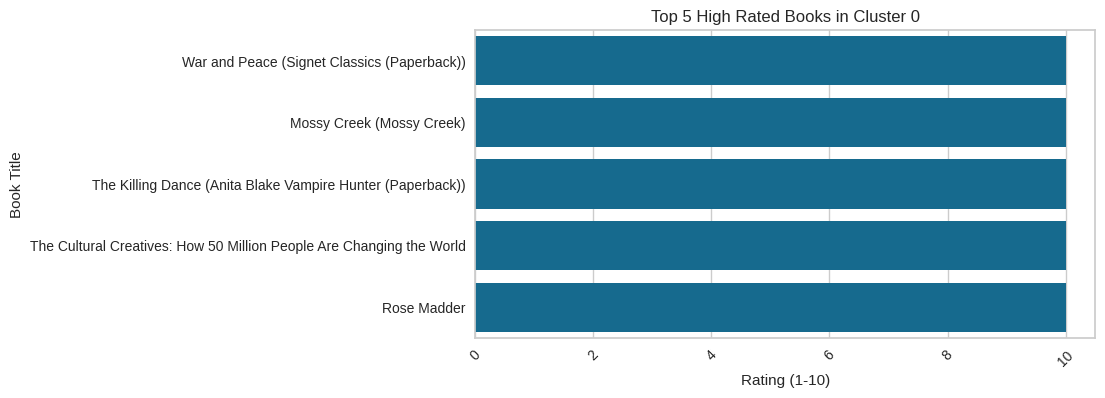

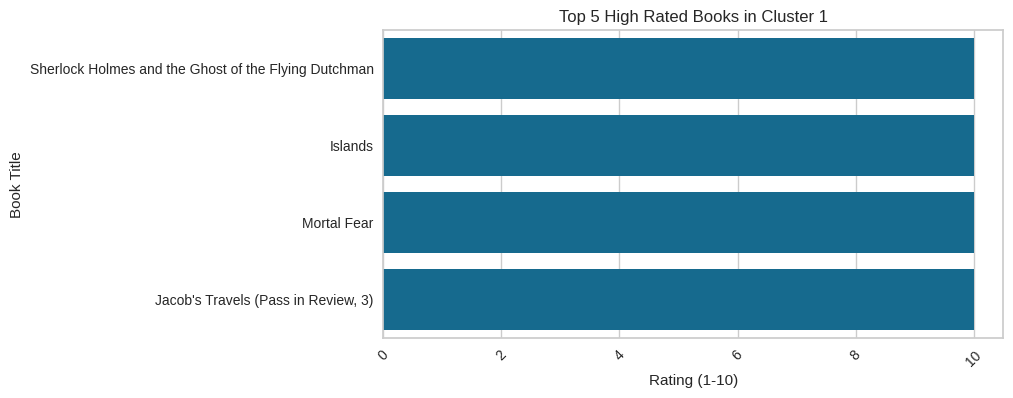

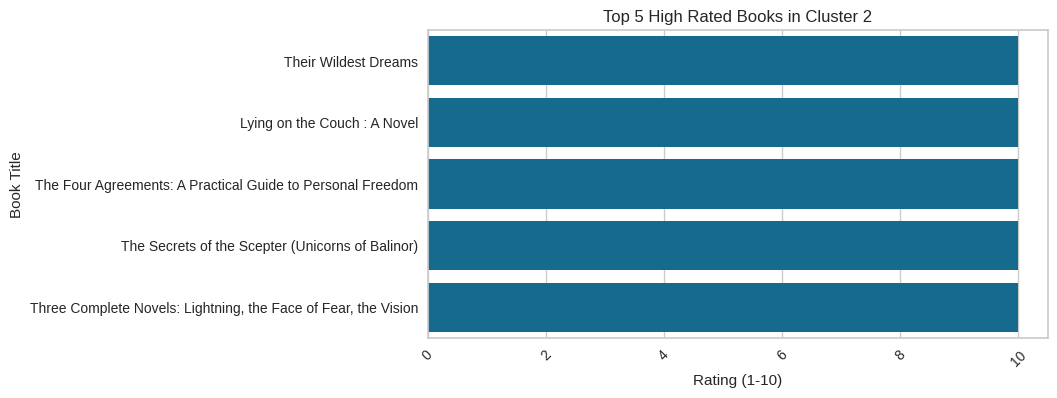

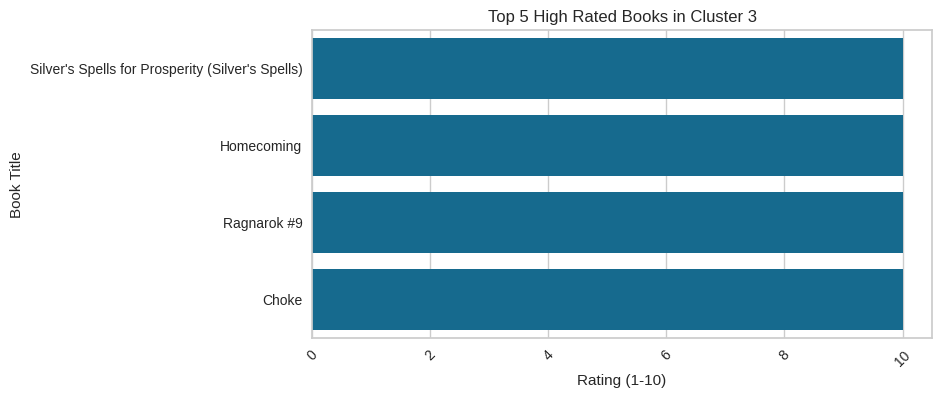

In [ ]:
top_rated_books = {}

for cluster in range(4):
  cluster_books = merged_data[merged_data['kmeans_cluster'] == cluster]
  top_rated_books[cluster] = cluster_books.sort_values(by='Book-Rating', ascending=False).head(5)

# Plot the top rated books for each cluster
for cluster, books in top_rated_books.items():
  plt.figure(figsize=(8, 4))
  ax = sns.barplot(x=books['Book-Rating'], y=books['Book-Title'])
  ax.set_title(f'Top 5 High Rated Books in Cluster {cluster}')
  plt.xlabel('Rating (1-10)')
  plt.ylabel('Book Title')
  ax.tick_params(axis='x', rotation=45)
  plt.show()
